In [1]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


60000 60000 10000 10000
784 60000 784 10000
===========this is the original image===========
6


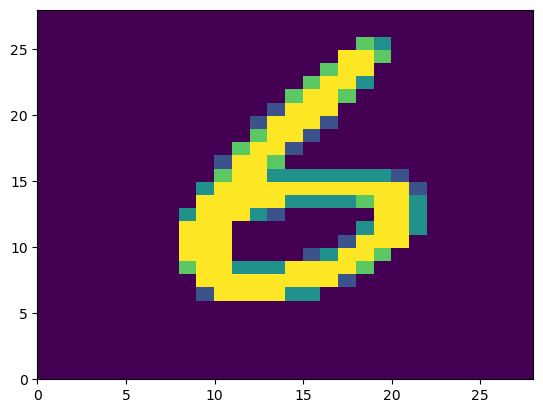

===========this is the vectorized image===========


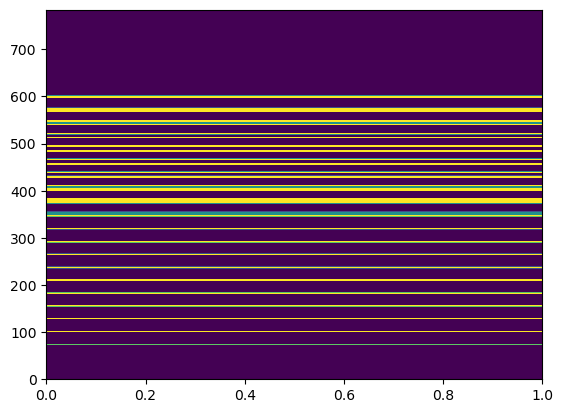

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

import numpy as np
from urllib import request
import gzip
import math
import pickle

def loadB():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)

        training_images, training_labels, testing_images, testing_labels = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
        # Normalize the images
        training_images.astype('float32')
        testing_images.astype('float32')
        training_images = training_images / 255
        testing_images = testing_images / 255
        return training_images, training_labels, testing_images, testing_labels


TRimg,TRlab,TSimg,TSlab=loadB()
print(len(TRimg),len(TRlab),len(TSimg),len(TSlab))
print(len(TRimg[0]),len(TRlab),len(TSimg[0]),len(TSlab))

showInd=66
Column=np.reshape(TRimg[showInd], (784, 1))
arr_2d = np.reshape(TRimg[showInd], (28, 28))
arr_2dT=np.rot90(arr_2d)
arr_2dTA=np.rot90(arr_2dT)
Final=np.fliplr(arr_2dTA)
#arr_2dTA=np.transpose(arr_2dT)
#arr_2dTB=np.transpose(arr_2dTA)
print("===========this is the original image===========")
plt.pcolor(Final)
print(TRlab[showInd])
plt.show()
print("===========this is the vectorized image===========")
plt.pcolor(Column)
plt.show()

#pcm = plt.pcolormesh(arr_2d,cmap='RdBu_r')
#plt.colorbar(pcm)
#plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

start = time.time()

epochs = 10
learning_rates = [0.01, 0.1, 0.001]
batch_sizes = [32, 128]

batch_sizes = [32]
learning_rates = [0.01]
class Net(nn.Module):

    
    def __init__(self):
        super(Net, self).__init__()
        
        self.l1 = nn.Linear(784, 200) # input layer
        self.l2 = nn.Linear(200, 50)  # hidden layer
        self.l3 = nn.Linear(50, 10)   # output layer
        self.MyRelu=nn.ReLU()         # relu function

    def forward(self, x):
        #x = F.relu(self.l1(x))
        x = self.MyRelu(self.l1(x))
        x = self.MyRelu(self.l2(x))
        return x
        



TRimgT = torch.tensor(TRimg, dtype=torch.float32)
TRlabT = torch.tensor(TRlab, dtype=torch.long)
TSimgT = torch.tensor(TSimg, dtype=torch.float32)
TSlabT = torch.tensor(TSlab, dtype=torch.long)




for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"\nTraining with learning rate: {lr}, batch size: {batch_size}")

        # Initialize model, loss function, and optimizer
        model = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr)

        # Set batch size
        TRimgT.batch_size = batch_size

        # Training loop
        for epoch in range(epochs):
          running_loss = 0.0
          for i in range(0, len(TRimgT), batch_size):
              inputs = TRimgT[i:i+batch_size].view(-1, 784)
              labels = TRlabT[i:i+batch_size]
              optimizer.zero_grad()
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()
              running_loss += loss.item()
          print(f"Epoch {epoch+1}, Loss: {running_loss / (len(TRimgT) / batch_size)}")

print("Training complete.")
end = time.time()
print(f"Total Time = {round(end-start)}")

correct = 0
total = 0
with torch.no_grad():
    for i in range(0, len(TSimg), batch_size):
        inputs = TSimgT[i:i+batch_size].view(-1, 784)
        labels = TSlabT[i:i+batch_size]
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test data: {100 * correct / total:.3f}%")



Training with learning rate: 0.01, batch size: 32
Epoch 1, Loss: 1.2549734550038973
Epoch 2, Loss: 0.37822767999370893
Epoch 3, Loss: 0.3244269172698259
Epoch 4, Loss: 0.29567201089560985
Epoch 5, Loss: 0.2737121879577637
Epoch 6, Loss: 0.2548405259559552
Epoch 7, Loss: 0.23799037456015745
Epoch 8, Loss: 0.2230171830634276
Epoch 9, Loss: 0.20973069350123405
Epoch 10, Loss: 0.19787199841340383
Training complete.
Total Time = 16
Accuracy on test data: 94.380%
